# Task 1: Preprocessing the Data

In [39]:
# Load and display the dataset
import pandas as pd

dataset = pd.read_csv('Dataset_BikeSharing.csv')
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1. Inspect the Dataset:

In [40]:
# Check for missing values and duplicates
print('Missing Values:\n', dataset.isnull().sum())
print('\nDuplicated Rows:\n', dataset.duplicated().sum())

Missing Values:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Duplicated Rows:
 0


Data is clean and does not contain any missing values or duplicates.

## 2. Encode Categorical Variables:

In [41]:
# Check for categorical variables
categorical = dataset.select_dtypes(include=['object'])
print('Categorical Variables:\n', categorical.columns)

Categorical Variables:
 Index(['datetime'], dtype='object')


Datetime is not a categorical variable. But to analyze the dataset better, we will split the 'datetime' column into separate 'year', 'month', 'day', and 'hour' columns.
Beside datetime, we don't have any categorical variables in the dataset.

In [42]:
# Split the dataset into separate 'year', 'month', 'day', and 'hour' columns
dataset['datetime'] = pd.to_datetime(dataset['datetime'])
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month
dataset['day'] = dataset['datetime'].dt.day
dataset['hour'] = dataset['datetime'].dt.hour
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


# Task 2: Exploratory Data Analysis (EDA)

## 1. Analyze the Target Variable:

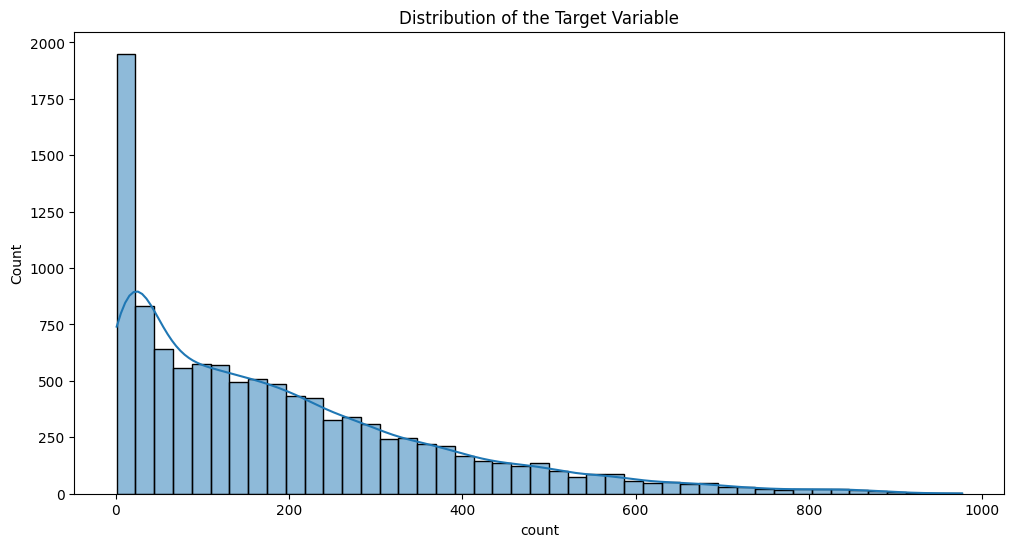

In [43]:
# The target variable is clearly the 'count' column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(dataset['count'], kde=True)
plt.title('Distribution of the Target Variable')
plt.show()

In [44]:
# Calculate inferential statistics for the target variable
dataset['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

We can see that the target variable is right-skewed with a mean of 191.57 and a standard deviation of 181.14.
So we have to normalize it later with the log transformation.

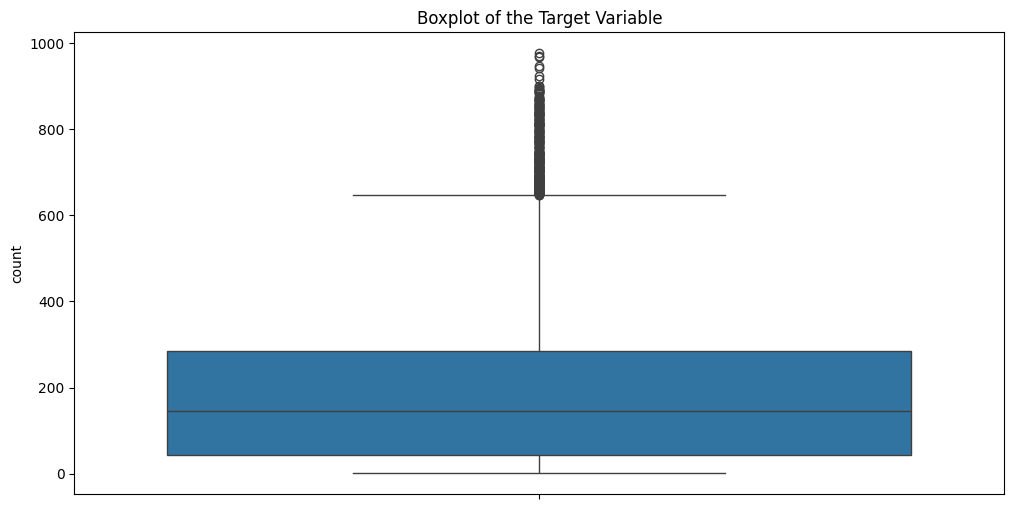

In [45]:
# Check for outliers in the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(dataset['count'])
plt.title('Boxplot of the Target Variable')
plt.show()

There is a significant number of outliers in the target variable.
The log transformation will help in reducing the impact of these outliers.


## 2. Analyze Relationships:

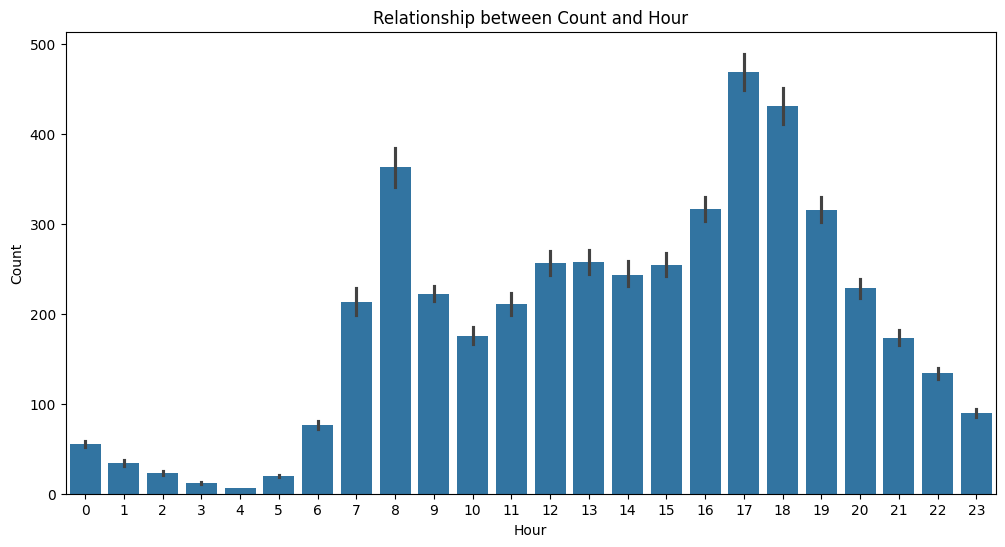

In [46]:
# Relationship between 'count' and 'hour'
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', data=dataset)
plt.title('Relationship between Count and Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

The number of bike rentals is higher during the morning and evening hours.

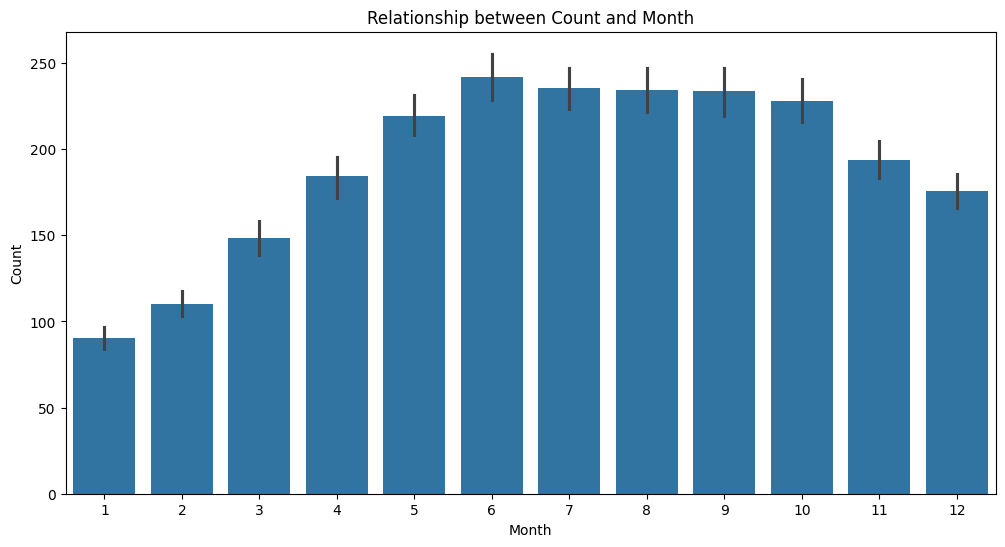

In [47]:
# Relationship between 'count' and 'month'
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', data=dataset)
plt.title('Relationship between Count and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

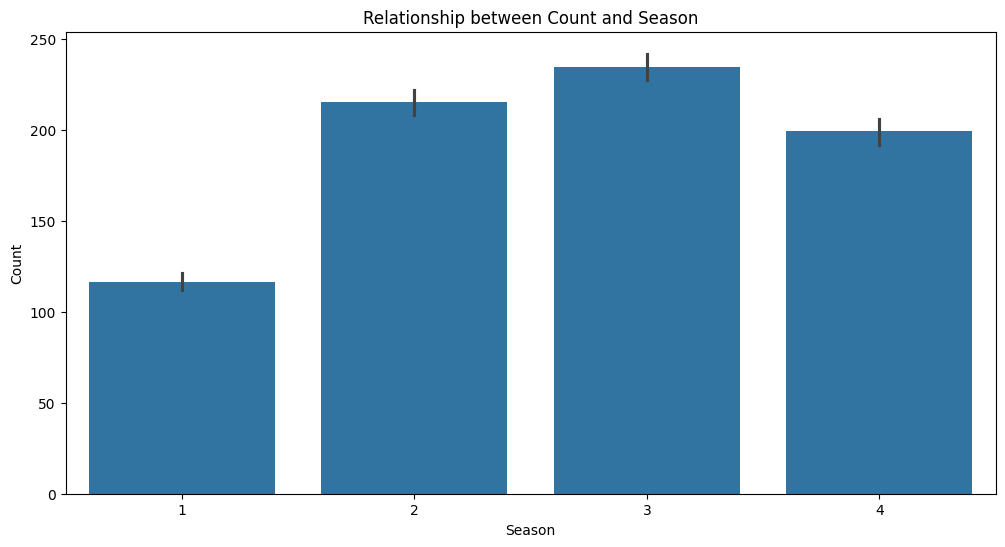

In [48]:
# Relationship between 'count' and 'season'
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', data=dataset)
plt.title('Relationship between Count and Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

The two plots look very similar. This is because the 'season' column is highly correlated with the 'month' column.

## 3. Correlation Analysis:

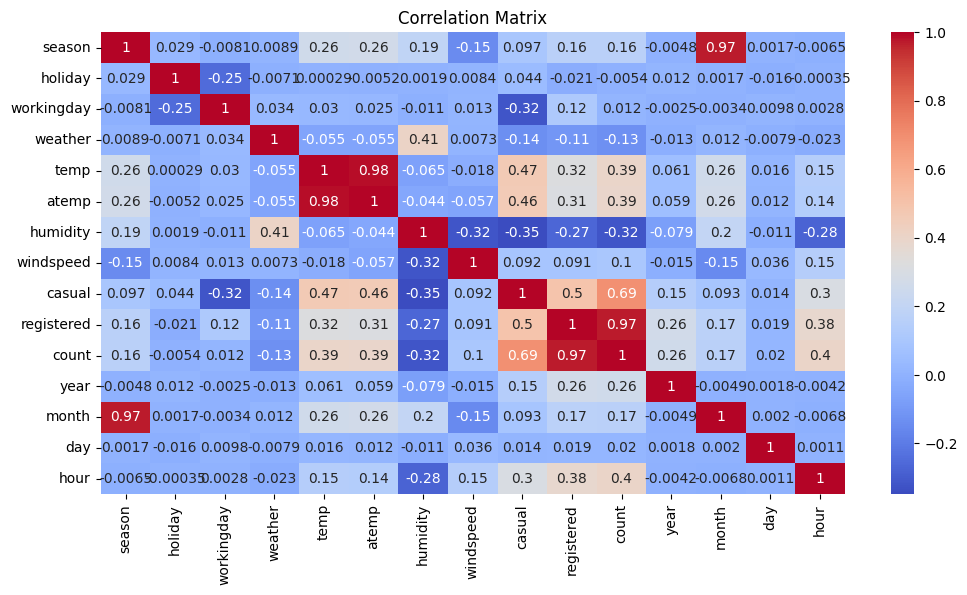

In [49]:
# Correlation matrix
dataset_temp = dataset.drop('datetime', axis=1)  # drop 'datetime' column temporarily
correlation = dataset_temp.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observations:
- The target variable 'count' has a strong positive correlation with 'registered' and 'casual'. This is expected since 'count' is the sum of 'registered' and 'casual'. So when we build the model, we should exclude these two variables as they are part of the result.
- 'season' and 'month' have a strong correlation with each other. We should exclude one of them from the model to avoid multicollinearity.
- 'temp' and 'atemp' have a strong correlation with each other. We should exclude one of them from the model to avoid multicollinearity.
- 'temp', 'humidity', and 'windspeed' have some correlation with the target variable 'count'.
- 'day', 'holiday' and 'workingday' have very weak correlations with the target variable 'count'. So they might not be useful in predicting the target variable. We can drop the 'holiday' at least. And we can try to analyze a new 'weekday' feature from 'day' and 'workingday' features and see if it has any effect on the target variable.

# Task 3: Feature Engineering

In [50]:
# Create a new feature 'weekday'
dataset['weekday'] = dataset['datetime'].dt.weekday
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [51]:
# Drop 'registered' and 'casual' columns (they are part of the target variable)
dataset.drop(['registered', 'casual'], axis=1, inplace=True)
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [52]:
# Drop 'atemp' column (we only need one of 'temp' and 'atemp')
dataset.drop('atemp', axis=1, inplace=True)
dataset.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1,2011,1,1,4,5


In [53]:
# Drop 'holiday'. We decided to keep 'workingday' for now since it might have some effects within other features. (Requires more techniques to analyze that)
dataset.drop('holiday', axis=1, inplace=True)
dataset.head()

,datetime,season,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,1,9.84,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,1,9.02,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,1,9.02,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,1,9.84,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,1,9.84,75,0.0,1,2011,1,1,4,5


In [54]:
# Drop 'season' since it is highly correlated with 'month'
dataset.drop('season', axis=1, inplace=True)
dataset.head()

,datetime,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,0,1,9.84,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,0,1,9.02,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,0,1,9.02,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,0,1,9.84,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,0,1,9.84,75,0.0,1,2011,1,1,4,5


In [55]:
# Drop 'datetime' column
dataset.drop('datetime', axis=1, inplace=True)
dataset.head()

,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour,weekday
0,0,1,9.84,81,0.0,16,2011,1,1,0,5
1,0,1,9.02,80,0.0,40,2011,1,1,1,5
2,0,1,9.02,80,0.0,32,2011,1,1,2,5
3,0,1,9.84,75,0.0,13,2011,1,1,3,5
4,0,1,9.84,75,0.0,1,2011,1,1,4,5


## Analyze the new features:

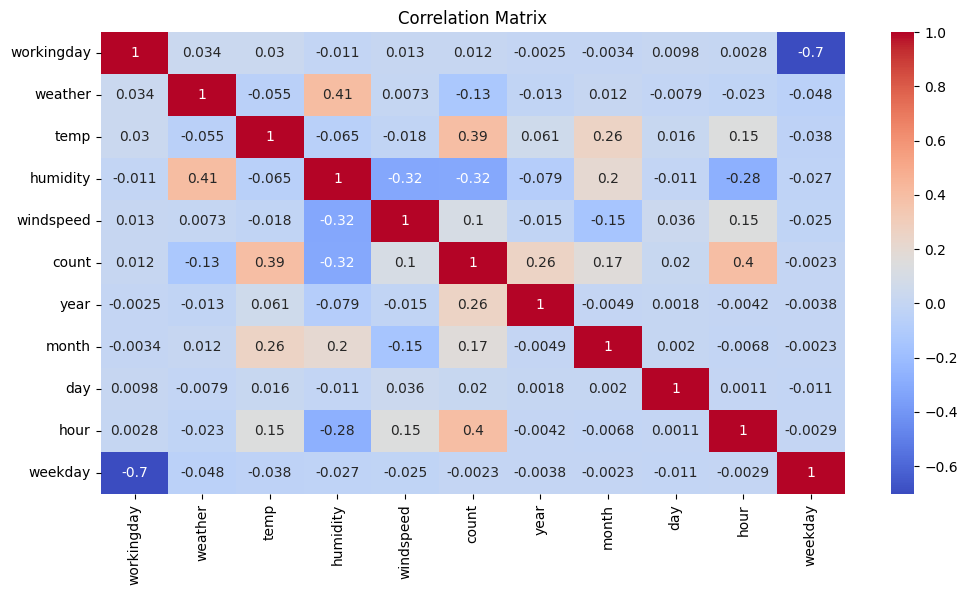

In [58]:
# Relationship between 'count' and 'weekday'
correlation = dataset.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

'weekday' does have some correlation with the target variable 'count'. So we will keep it.
The rest of new features we added before are also corelated with the target variable ('hour', 'month', 'year').
But 'day' has a very weak correlation with the target variable. So we can drop it.

In [59]:
# Drop 'day' column
dataset.drop('day', axis=1, inplace=True)
dataset.head()

,workingday,weather,temp,humidity,windspeed,count,year,month,hour,weekday
0,0,1,9.84,81,0.0,16,2011,1,0,5
1,0,1,9.02,80,0.0,40,2011,1,1,5
2,0,1,9.02,80,0.0,32,2011,1,2,5
3,0,1,9.84,75,0.0,13,2011,1,3,5
4,0,1,9.84,75,0.0,1,2011,1,4,5


# Task 4: Build and Evaluate a Linear Regression Model

## 1. Train-Test Split:

In [60]:
# Separate the feature columns and target variable
X = dataset.drop('count', axis=1)
y = dataset['count']

In [73]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Copy for later use
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

## 2. Prepare the Data for Training:

In [74]:
# Normalize the target variable using log transformation
import numpy as np

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [89]:
# Normalize the feature columns, let's use StandardScaler (it handles outliers better)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_copy)
X_test = scaler.transform(X_test_copy)

## 2. Train the Model:

In [107]:
# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R² Score: {r2}")
    return y_pred

In [108]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
# Evaluate the model MAE, RMSE, and R² Score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)

MAE: 0.8134824373363592
RMSE: 1.0249765794339096
R² Score: 0.48964083818416637


Let's try again with Ridge and Lasso regression models to see if they can improve the results.

In [110]:
# Train a Ridge regression model
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=np.logspace(-4, 0, 100), cv=5)
y_pred = evaluate_model(ridge_cv, X_train, y_train, X_test, y_test)
print(f"Best alpha for Ridge: {ridge_cv.alpha_}")

MAE: 0.813547303847103
RMSE: 1.025012808210907
R² Score: 0.48960475928168057
Best alpha for Ridge: 1.0


In [111]:
# Train a Lasso regression model
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=np.logspace(-4, 0, 100), cv=5)
y_pred = evaluate_model(lasso_cv, X_train, y_train, X_test, y_test)
print(f"Best alpha for Lasso: {lasso_cv.alpha_}")

MAE: 0.8139886529734288
RMSE: 1.0252285648184787
R² Score: 0.4893898688245758
Best alpha for Lasso: 0.0006428073117284319


## Plot the Predictions:

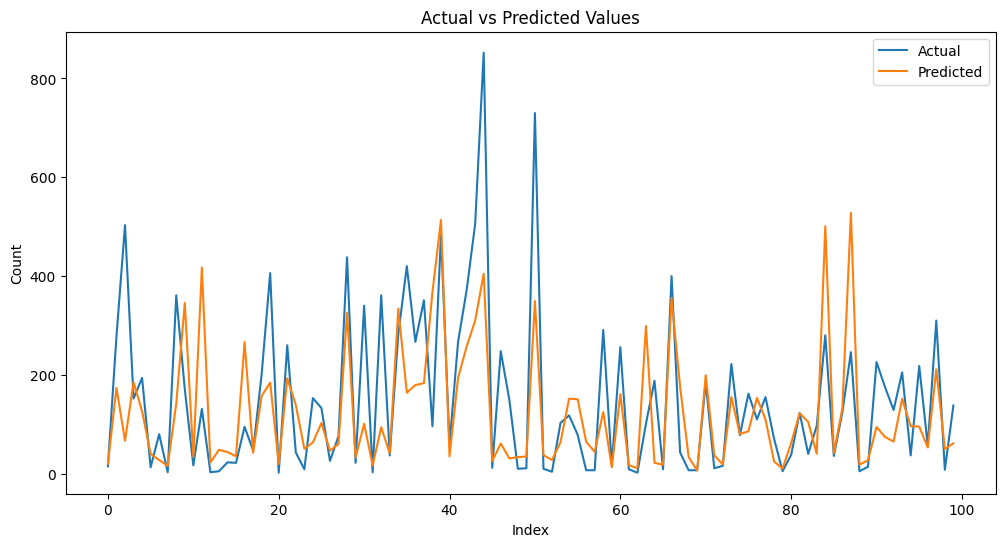

In [117]:
# Plot the predictions (sample of 100 random values)
plt.figure(figsize=(12, 6))
indexes = np.random.choice(range(len(y_test)), 100, replace=False)
plt.plot(range(100), np.expm1(y_test.iloc[indexes]), label='Actual')
plt.plot(range(100), np.expm1(y_pred[indexes]), label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.show()

# Summary

Generally speaking, the linear regression model performed well on the dataset.
The MAE and RMSE values are low, indicating that the model is making accurate predictions.
But the R² Score is not very high, which means that the model is not explaining all the variance in the data.
Ridge and Lasso regression models did not improve the results significantly.